In [1]:
from pathlib import Path

import numpy as np
import pandas as pd

from tqdm.auto import tqdm
from matplotlib import pyplot as plt

from spcup2023.dataset import spcup23_ds
from spcup2023 import load_result, show_dist

In [2]:
_RESULT_PATH = Path("../submissions")
_DS_PATH = Path("../dataset")

train_ds = spcup23_ds(_DS_PATH, test=False)

label_train = np.zeros(len(train_ds))
for i in range(len(train_ds)):
    filename, label, fnc, icn_tc = train_ds[i]
    label_train[i] = label

In [3]:
def compa(test1_dt, test2_dt, path=Path("../notebooks")):
    num = str(test1_dt)
    if len(num) == 1:
        num = "0"+num

    train_path1 = path / ( num + "_train.csv")
    test_path1 = path / ( num + "_test.csv")

    train1 = pd.read_csv(str(train_path1), sep=',').Predicted.to_numpy()
    test1 = pd.read_csv(str(test_path1), sep=',').Predicted.to_numpy()
    
    num = str(test2_dt)
    if len(num) == 1:
        num = "0"+num

    train_path2 = path / ( num + "_train.csv")
    test_path2 = path / ( num + "_test.csv")

    train2 = pd.read_csv(str(train_path2), sep=',').Predicted.to_numpy()
    test2 = pd.read_csv(str(test_path2), sep=',').Predicted.to_numpy()
    
    BP_ts1_ind = []
    SH_ts1_ind = []
    BP_ts2_ind = []
    SH_ts2_ind = []
    for i, tr in enumerate(test1):
        if(tr >= 0.40):
            BP_ts1_ind.append(i)
        else:
            SH_ts1_ind.append(i)
            
    for i, ts in enumerate(test2):
        if(ts >= 0.40):
            BP_ts2_ind.append(i)
        else:
            SH_ts2_ind.append(i)
            
    BP = set(BP_ts1_ind).intersection(set(BP_ts2_ind))
    BP_wsp = len(BP)
    
    SH = set(SH_ts1_ind).intersection(set(SH_ts2_ind))
    SH_wsp = len(SH)
    
    BP_u = set(BP_ts1_ind).difference(set(BP_ts2_ind))
    BP_un1 = len(BP_u)
    
    SH_u = set(SH_ts1_ind).difference(set(SH_ts2_ind))
    SH_un1 = len(SH_u)
    
    BP_u2 = set(BP_ts2_ind).difference(set(BP_ts1_ind))
    BP_un2 = len(BP_u2)
    
    SH_u2 = set(SH_ts2_ind).difference(set(SH_ts1_ind))
    SH_un2 = len(SH_u2)
    
    print(f"There are {BP_wsp} BP common values")
    print(f"There are {SH_wsp} SH common values")
    print(f"There are {BP_un1} BP unique values in 1")
    print(f"There are {SH_un1} SH unique values in 1")
    print(f"There are {BP_un2} BP unique values in 2")
    print(f"There are {SH_un2} SH unique values in 2")
    
    return

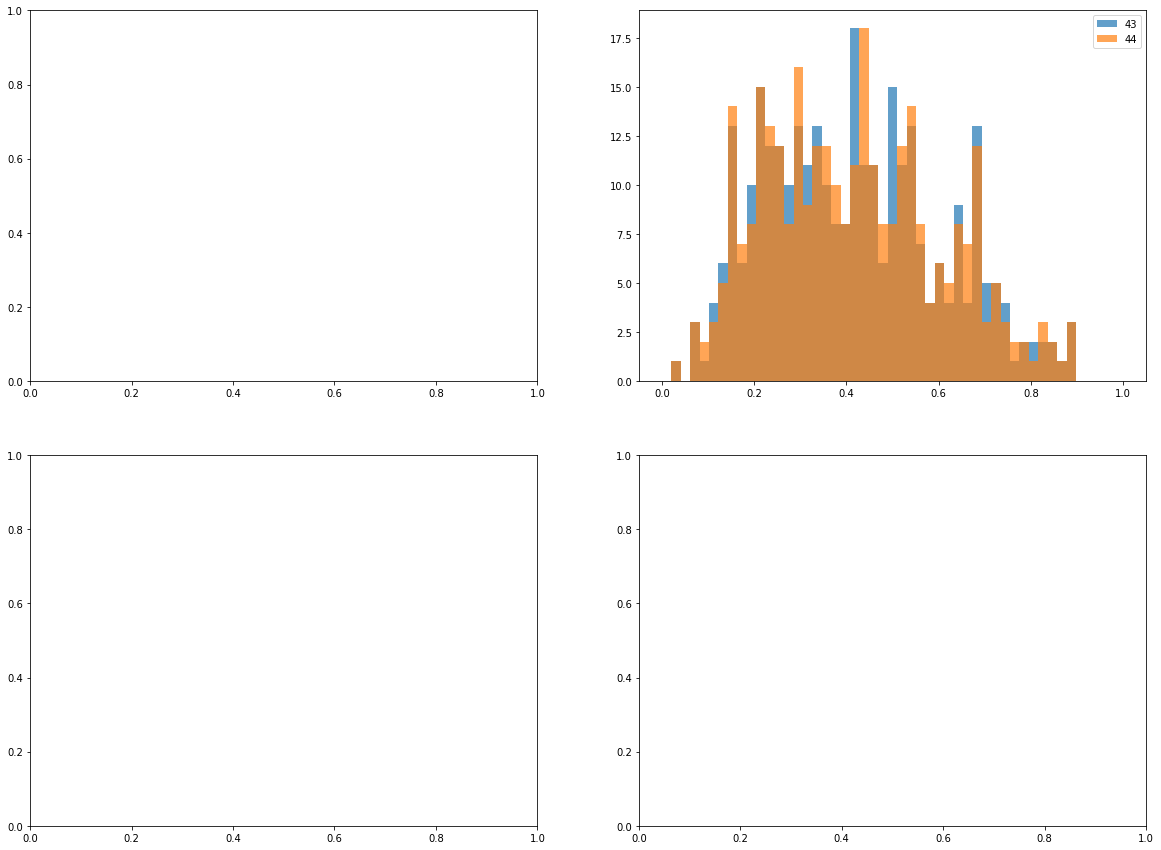

In [93]:
fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,figsize=(20,15))

bins = np.linspace(0, 1, 50)

# ax1.hist(test_pred_1, bins, label="39")
# #ax1.hist(test_pred_2, bins, label="40",alpha=0.7)
# ax1.hist(test_pred_2, bins, label="95",alpha=0.7)
# ax1.legend()


ax2.hist(test_pred_2, bins, label="43",alpha=0.7)
ax2.hist(test_pred_3, bins, label="44",alpha=0.7)
ax2.legend()

# ax3.hist(test_pred_4, bins, label="41 - fuzja",)
# ax3.hist(test_pred_3, bins, label="44",alpha=0.7)
# ax3.legend()

# ax4.hist(test_pred_4, bins, label="41 - fuzja",)
# ax4.hist(test_pred_2, bins, label="95",alpha=0.7)
# ax4.legend()
plt.show()

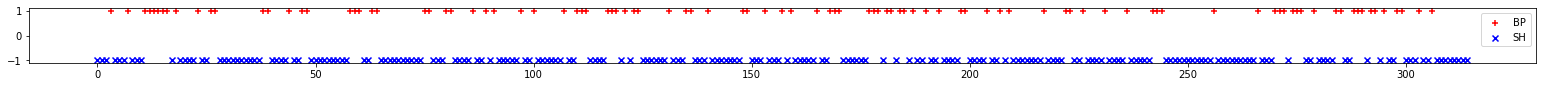

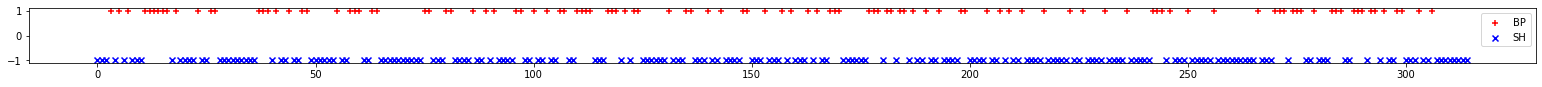

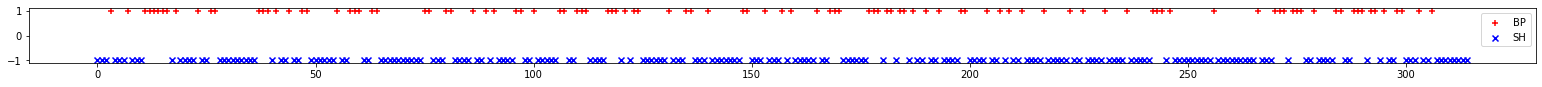

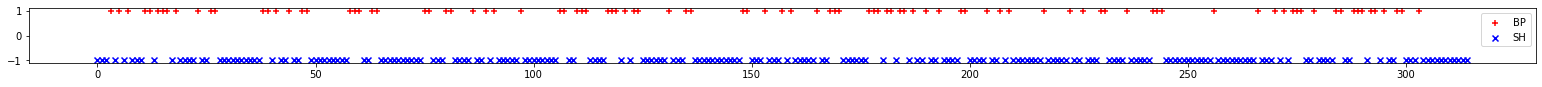

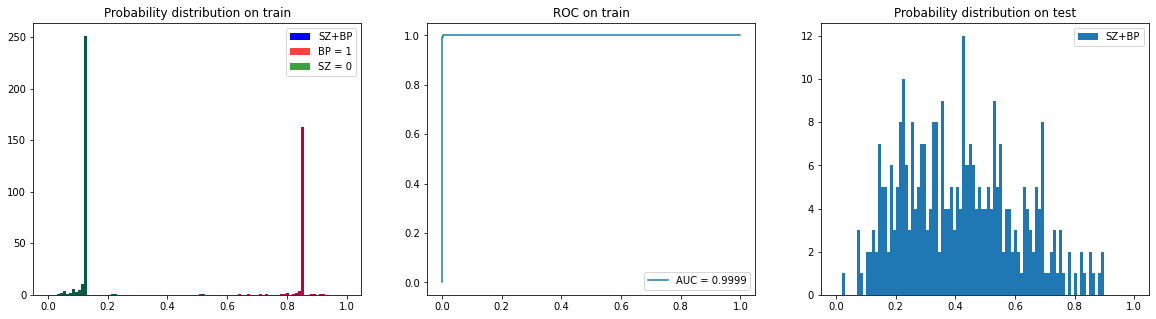

BP_tr: 184 SH_tr: 287
BP_ts: 105 SH_ts: 210


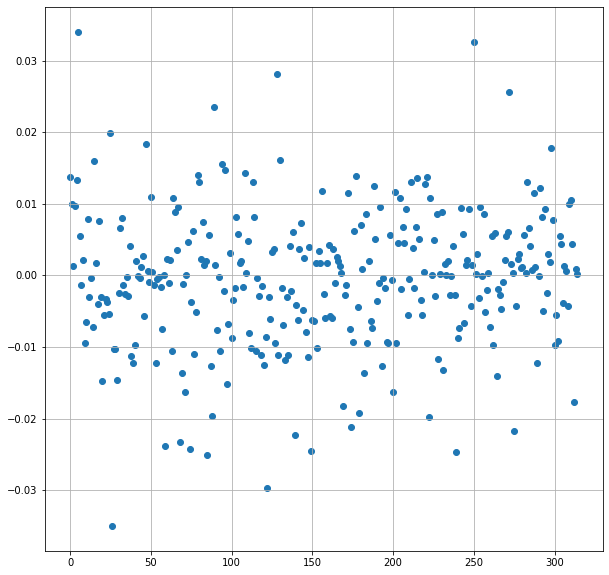

In [92]:
train_pred_1, test_pred_1, BP_tr_1, SH_tr_1, BP_ts_1, SH_ts_1 = load_result(39)
train_pred_2, test_pred_2, BP_tr_2, SH_tr_2, BP_ts_2, SH_ts_2 = load_result(43) #najnowsza 
train_pred_3, test_pred_3, BP_tr_3, SH_tr_3, BP_ts_3, SH_ts_3 = load_result(44) #najnowsza perc 41 
train_pred_4, test_pred_4, BP_tr_4, SH_tr_4, BP_ts_4, SH_ts_4 = load_result(41) # fuzja 


show_dist(label_train, train_pred_3, test_pred_3) #perc=40 submission z alpha=0.1 2k iteracji
print("BP_tr:", BP_tr_3, "SH_tr:", SH_tr_3)
print("BP_ts:", BP_ts_3, "SH_ts:", SH_ts_3)


x=test_pred_2-test_pred_3
fig,axes=plt.subplots(1,1,figsize=(10,10))
axes.scatter(np.arange(0, len(x)),x)
axes.grid()
plt.show()

In [89]:
compa(39 ,43, path=Path("../notebooks")) #JA 

There are 153 BP common values
There are 147 SH common values
There are 7 BP unique values in 1
There are 8 SH unique values in 1
There are 8 BP unique values in 2
There are 7 SH unique values in 2


In [94]:
print(test_pred_3)

[0.3420206  0.20044106 0.35078326 0.66351069 0.39958743 0.4660039
 0.22326338 0.73253746 0.22221233 0.23532757 0.26925672 0.81902868
 0.53324008 0.52228087 0.57672161 0.58511333 0.59309216 0.33169966
 0.58272049 0.23968814 0.31366671 0.18327981 0.25571787 0.8973784
 0.42640699 0.43162691 0.63552637 0.51024817 0.3547911  0.41099144
 0.35636064 0.29718637 0.48247515 0.23027298 0.34132646 0.30112538
 0.14397144 0.52643424 0.73114562 0.51220992 0.22504136 0.53973166
 0.43227671 0.12319669 0.53505333 0.2591596  0.25886926 0.66799049
 0.69531848 0.42521029 0.43621502 0.44449193 0.25725499 0.2815343
 0.161835   0.50819724 0.33332396 0.21776236 0.5        0.54009713
 0.63680025 0.29553171 0.21827284 0.56920694 0.54556042 0.27048151
 0.14372808 0.46580477 0.23492    0.32450095 0.14695509 0.4483687
 0.1159167  0.18828689 0.37711294 0.77932289 0.62965628 0.23017903
 0.20494353 0.44835601 0.63781202 0.80172228 0.3622818  0.36887289
 0.13290038 0.44522477 0.68453941 0.23971229 0.38290382 0.66712178

In [25]:
# compa(36 ,44, path=Path("../notebooks")) #JA 

In [ ]:
compa(35 ,44, path=Path("../notebooks")) #TY

In [6]:
compa(13 ,35, path=Path("../notebooks")) #

There are 109 BP common values
There are 141 SH common values
There are 24 BP unique values in 1
There are 41 SH unique values in 1
There are 41 BP unique values in 2
There are 24 SH unique values in 2
